[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Columns after renaming: Index(['Timestamp', 'Overall Rating(1-5)', 'Speaker Quality(1-5)',
       'Content Relevance (1-5)', 'Would Recommend?',
       'Feedback Comments (Event)'],
      dtype='object')

DataFrame head:
            Timestamp  Overall Rating(1-5)  Speaker Quality(1-5)  \
0 2025-02-15 10:05:00                    4                     5   
1 2025-02-15 10:12:00                    2                     2   
2 2025-02-15 10:20:00                    5                     5   
3 2025-02-15 10:28:00                    3                     4   
4 2025-02-15 10:35:00                    4                     3   

   Content Relevance (1-5) Would Recommend?  \
0                        4              Yes   
1                        3               No   
2                        5              Yes   
3                        2               No   
4                        4              Yes   

                           Feedback Comments (Event)  
0  The speakers were fantastic a

/tmp/ipython-input-2866270186.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aspect', y='Average Score', data=average_ratings_df, palette='viridis')


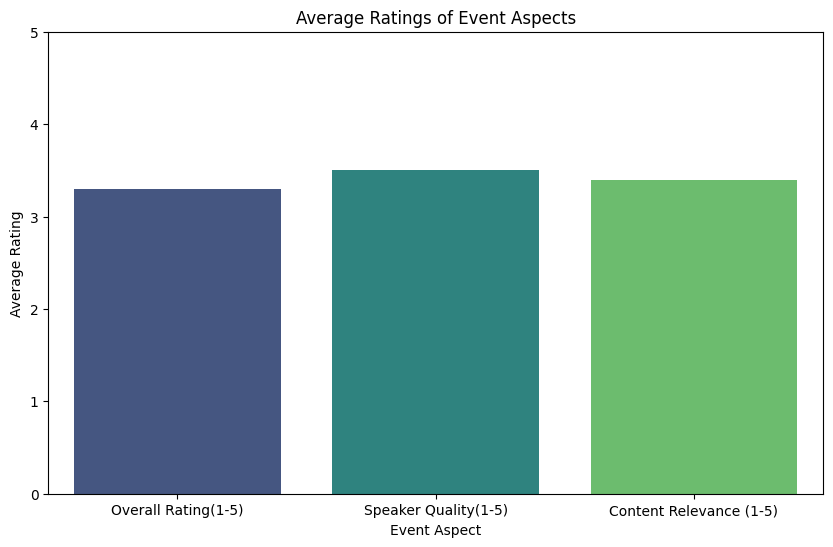

/tmp/ipython-input-2866270186.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='magma')


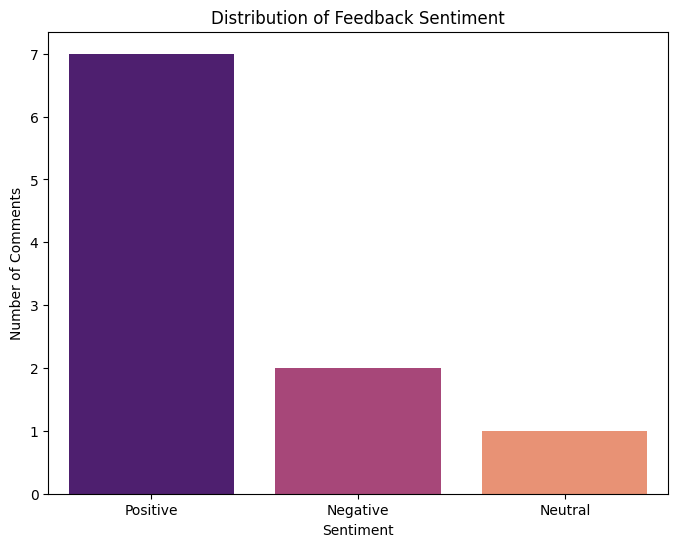

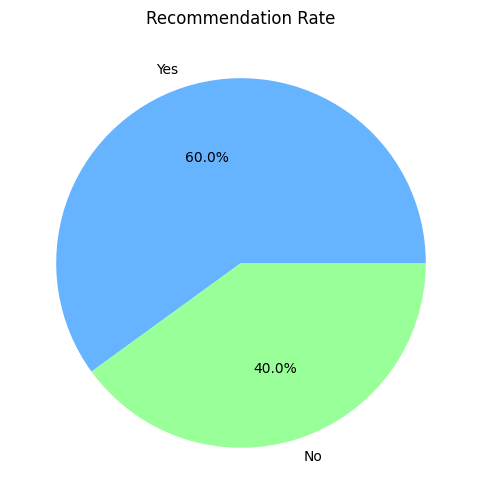

In [10]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk

# Step 1: Set Up Your Environment and Import Data

# Install the necessary library
!pip install textblob

# Download the NLTK package
nltk.download('punkt')

# Load the Excel file with the correct filename
df = pd.read_excel('College_event_feedback.csv.xlsx')

# Rename the column to fix the KeyError by removing the trailing space
# Using the correct column name based on the dataframe structure
df.rename(columns={'Feedback Comments ': 'Feedback Comments (Event)'}, inplace=True)

# Print the columns and head to verify the changes
print("Columns after renaming:", df.columns)
print("\nDataFrame head:")
print(df.head())


# Step 2: Clean Your Data and Perform Sentiment Analysis

# Fill any empty feedback comments with a blank string
df['Feedback Comments (Event)'] = df['Feedback Comments (Event)'].fillna('')

# Function to get the sentiment polarity score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function to the 'Feedback Comments' column
df['Sentiment Score'] = df['Feedback Comments (Event)'].apply(get_sentiment)

# Function to categorize the sentiment as Positive, Negative, or Neutral
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function
df['Sentiment Category'] = df['Sentiment Score'].apply(categorize_sentiment)
print("\nDataFrame head with new sentiment columns:")
print(df.head())


# Step 3: Create Visualizations

# Bar Chart for Average Ratings
# Corrected column names to match the dataframe
average_ratings = df[['Overall Rating(1-5)', 'Speaker Quality(1-5)', 'Content Relevance (1-5)']].mean()
average_ratings_df = average_ratings.reset_index()
average_ratings_df.columns = ['Aspect', 'Average Score']

plt.figure(figsize=(10, 6))
sns.barplot(x='Aspect', y='Average Score', data=average_ratings_df, palette='viridis')
plt.title('Average Ratings of Event Aspects')
plt.ylim(0, 5)
plt.xlabel('Event Aspect')
plt.ylabel('Average Rating')
plt.show()

# Count Plot for Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment Category', data=df, palette='magma')
plt.title('Distribution of Feedback Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Pie Chart for Recommendations
plt.figure(figsize=(6, 6))
recommendation_counts = df['Would Recommend?'].value_counts()
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Recommendation Rate')
plt.ylabel('')
plt.show()